In [5]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image



In [6]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()
model

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [2]:
# dir(models)

In [7]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [7]:
!mkdir images

In [8]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage:
# save_image_from_url("https://avatars.githubusercontent.com/u/10209765?v=4", "q1.jpg")
# save_image_from_url("https://scontent.flhe5-1.fna.fbcdn.net/v/t39.30808-6/275917794_2482492235218885_4631272504791956142_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=833d8c&_nc_eui2=AeHWuAbPJsRKclcWUiLf-78jMiaC2CiK4ZgyJoLYKIrhmMdy2cLHzWmpcFVskYm2ChfuyhdVN9VMPs55LhPMDm-6&_nc_ohc=rTXzYJIY6R4Q7kNvgHeCZhU&_nc_ht=scontent.flhe5-1.fna&_nc_gid=Ak7A0qn1buL26YLzRmYBUIQ&oh=00_AYDzPBEgY-tyYYe9DC819siNMBwnxEB9woRpEh91lyD6cw&oe=670BEB7F","q2.jpg")
# save_image_from_url("https://scontent.flhe5-1.fna.fbcdn.net/v/t1.6435-9/80770231_10158241831915110_2824355560248311808_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=53a332&_nc_eui2=AeHxgLWZH6mZs3OJZueXokAPbBBX0JxSoV1sEFfQnFKhXVQQEpG0a47SMMmu7nqO0CC_TEa-Nrz6cLqc_FoFhAWM&_nc_ohc=AFb7RaP27z8Q7kNvgG-rPiE&_nc_ht=scontent.flhe5-1.fna&_nc_gid=A-ZJO7l_HWmWLMRPFKkhiiL&oh=00_AYBu1YcF9aupbOH6SO-y0dMyklGfn_FTgS-SUH9myo-cbw&oe=672D7322", "h1.jpg")

# save_image_from_url("https://scontent.flhe5-1.fna.fbcdn.net/v/t1.6435-9/57852293_10157567842240110_2049896192829030400_n.jpg?_nc_cat=107&ccb=1-7&_nc_sid=53a332&_nc_eui2=AeEk4kVaDhD8ghq2pE2VWHEvoIBfz4kPusWggF_PiQ-6xc95tElCENMHaVjT4rqx4loWXPjEBs9uS2TyF3L6qrPN&_nc_ohc=bIrCwv4iw-QQ7kNvgG-g1rV&_nc_ht=scontent.flhe5-1.fna&_nc_gid=APG5eTMipqurWuTWOT0sLfC&oh=00_AYDOPUUSqr4qLJKIjS4AwmGl3uTOmCpke5hR_PGZZG00sA&oe=672DA3AA", "h2.jpg")


# save_image_from_url("https://scontent.flhe5-1.fna.fbcdn.net/v/t1.6435-9/47425086_2240250332965313_3527440100285743104_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=1d70fc&_nc_eui2=AeFHMD0V-pT550US1hioWspj6om7m_QzEgHqibub9DMSAf1_3V8DBfRGbI3TECCZAAuqZGAPyqXTc6Jeo4f08mni&_nc_ohc=spkDK-weatwQ7kNvgH9MGeE&_nc_ht=scontent.flhe5-1.fna&_nc_gid=Ak4ceYw7zLnpVTD1UQf31dE&oh=00_AYB6X9A-fi5RVN3lieGslRv43oaw8jjYG0i-iNN4lKt3qA&oe=672D85D3",'A1.jpg')

In [9]:
# Example usage
image_path = "./images/q2.jpg"
q2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", q2.shape)
print("Image Embedding:", q2)




Image Embedding Shape: (512,)
Image Embedding: [ 0.04315117  0.02063251 -0.06848832  0.01147628 -0.04601656  0.01075961
  0.00530971  0.08525577 -0.01317805 -0.07169873  0.01817756 -0.0261966
  0.05528744 -0.02662777  0.03457779 -0.00388678 -0.0134752   0.02951999
  0.00280094  0.01173099 -0.04271879  0.03187269  0.03756462 -0.03719071
  0.05901795 -0.00594066  0.00142006 -0.09124755 -0.0196762   0.02102972
 -0.01240477  0.08773046 -0.05332723  0.04269671 -0.00388081  0.03010729
  0.00574802 -0.00176498 -0.0465962  -0.03508081 -0.00940112  0.03808535
 -0.01887076  0.00408442 -0.03628283 -0.03803745 -0.02457328  0.07546216
 -0.07510046 -0.03673455 -0.03002887  0.00462795  0.03536314  0.05180257
 -0.03405428  0.07149892 -0.02292904  0.07285961  0.0173149   0.01236917
  0.06635361  0.06245001  0.00478035 -0.0368313   0.04023913  0.03607243
 -0.03626389 -0.05410234  0.08669978  0.0161058  -0.07964152 -0.0035846
  0.00183197 -0.03115337  0.08911931 -0.01363888 -0.07361647 -0.04731994
  0.00

In [11]:
image_path = "./images/h2.png"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)



Image Embedding Shape: (512,)
Image Embedding: [-6.36438082e-04 -1.57123478e-03 -1.08245559e-01  1.88187379e-02
 -9.31758375e-04 -6.44788742e-02  2.48890067e-03  8.56769383e-02
 -6.26038481e-03 -1.79916229e-02 -1.61150862e-02 -2.10050847e-02
  4.20706086e-02 -2.43438575e-02 -1.54505791e-02  1.89834740e-02
 -6.40960038e-02 -8.91792588e-03  1.09094931e-02  3.87131572e-02
  7.19491998e-03 -1.17984358e-02 -1.00621243e-03 -8.27678964e-02
  5.10279983e-02 -1.57505590e-02  6.78289980e-02 -4.89808572e-03
  6.12836704e-02  3.96920778e-02 -2.89245453e-02 -1.91414226e-02
 -5.50673455e-02  4.84134592e-02 -1.23008825e-02  4.99892272e-02
  1.93172321e-02  8.76000747e-02 -7.47842938e-02  5.42285200e-03
 -3.31705697e-02  3.45662646e-02  5.03158607e-02  8.76593404e-03
 -6.59189597e-02 -1.23521080e-02 -2.14011762e-02  5.16044088e-02
 -1.08278476e-01  1.04901893e-02  5.21869631e-03 -9.93375629e-02
  3.41553986e-02 -1.46657443e-02 -5.23327217e-02  3.60514149e-02
 -2.33977009e-02  9.11623612e-02  1.1669511

In [12]:
q1 = create_image_embedding("./images/q1.jpg")
q2 = create_image_embedding("./images/q2.jpg")
h1 = create_image_embedding("./images/h1.png")
h2 = create_image_embedding("./images/h2.png")
a1 = create_image_embedding("./images/A1.jpg")

In [13]:
h1.shape

(512,)

In [14]:
!pip install -Uq pymilvus

In [15]:
#Imports a PyMilvus package:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

In [16]:
#Connect to the Milvus
connections.connect("default", host="localhost", port="19530")


In [20]:
# Define the collection name
collection_name = "image"

# Delete old collection if it exists
if utility.has_collection(collection_name):
    Collection(collection_name).drop()

In [21]:
#Creates a collection:
fields = [
    FieldSchema(name="pk", dtype=DataType.INT64, is_primary=True, auto_id=False),
    FieldSchema(name="words", dtype=DataType.VARCHAR, max_length=50),
    FieldSchema(name="person_name", dtype=DataType.VARCHAR, max_length=50),
    FieldSchema(name="embeddings", dtype=DataType.FLOAT_VECTOR, dim=512)
]
schema = CollectionSchema(fields, "Simple Demo for image similar search")
image = Collection("image", schema)


In [22]:
# Builds indexes on the entities:

index = {
    "index_type": "IVF_FLAT",
    "metric_type": "L2",
    "params": {"nlist": 128},
}

image.create_index("embeddings", index)

Status(code=0, message=)

In [24]:
#Insert data in collection
data = [
    [1,2,3,4,5],  # field pk
    ['q1','q2','h1','h2','A1'],  # field words
    ["Qasim","Qasim","Hasnant","Hasnat","Auranzaib"],
    [q1, q2, h1, h2, a1],  # field embeddings
]

In [25]:
image.insert(data)
image.flush()
image.load()

In [26]:
search_params = {"metric_type": "L2"}

In [27]:
results = image.search(
	data=[h1],
	anns_field="embeddings",
	param=search_params,
	limit=4,
	expr=None,
	# set the names of the fields you want to retrieve from the search result.
	output_fields=['words','person_name'],
	consistency_level="Strong"
)

In [28]:
results[0].ids

[3, 4, 5, 1]

In [29]:
results[0].distances

[0.0, 0.4865383207798004, 1.377936840057373, 1.581334114074707]

In [31]:
hit = results[0][3]
hit.entity.get('person_name')

'Qasim'

In [32]:
results[0][0].entity.get('person_name')

'Hasnant'

In [33]:
from PIL import Image

Hasnant


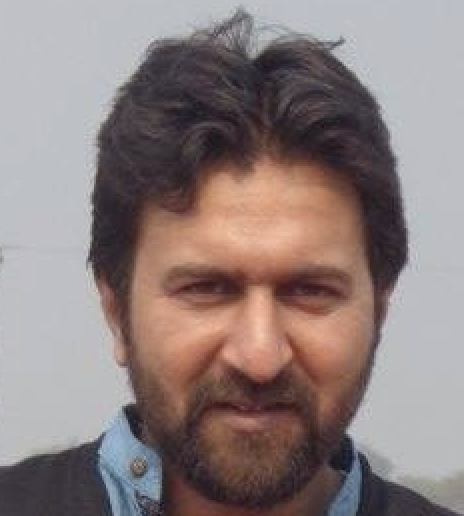

Hasnat


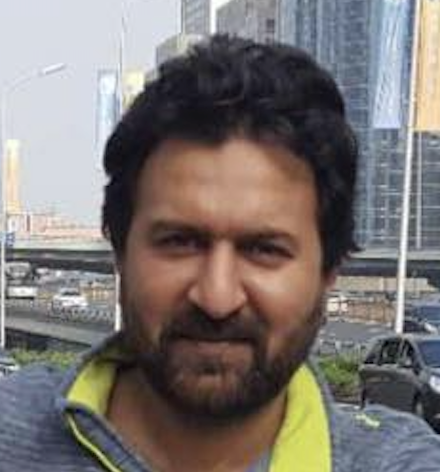

Auranzaib


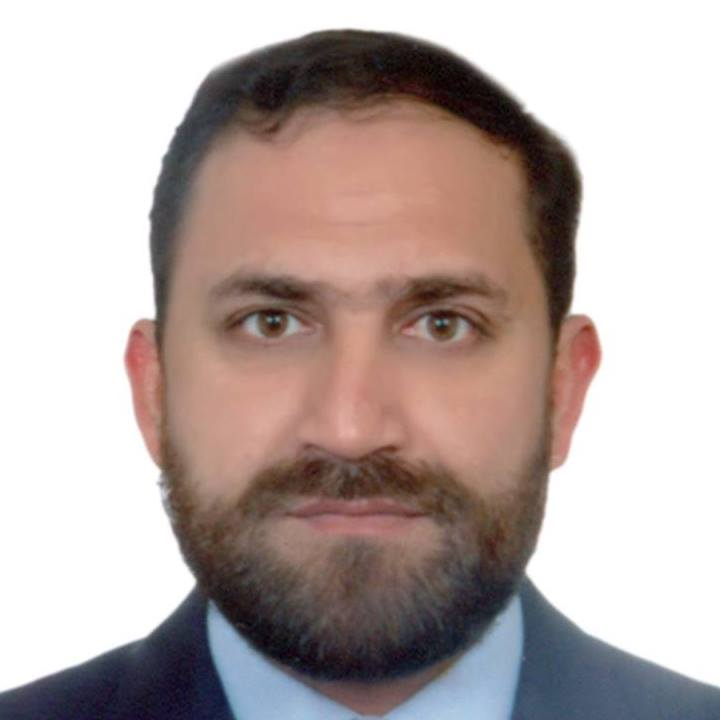

Qasim


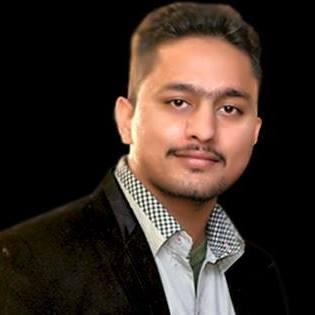

In [34]:
for i in range(0,len(results[0])):
    name = results[0][i].entity.get('words')
    pname = results[0][i].entity.get('person_name')
    print(pname)
    try:
        display(Image.open('./images/'+name+'.jpg'))
    except:
        display(Image.open('./images/'+name+'.png'))

In [35]:
results = image.search(
	data=[q1],
	anns_field="embeddings",
	param=search_params,
	limit=2,
	expr=None,
	# set the names of the fields you want to retrieve from the search result.
	output_fields=['words'],
	consistency_level="Strong"
)

q1


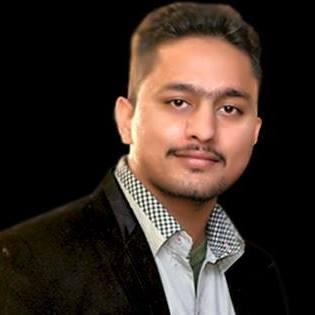

q2


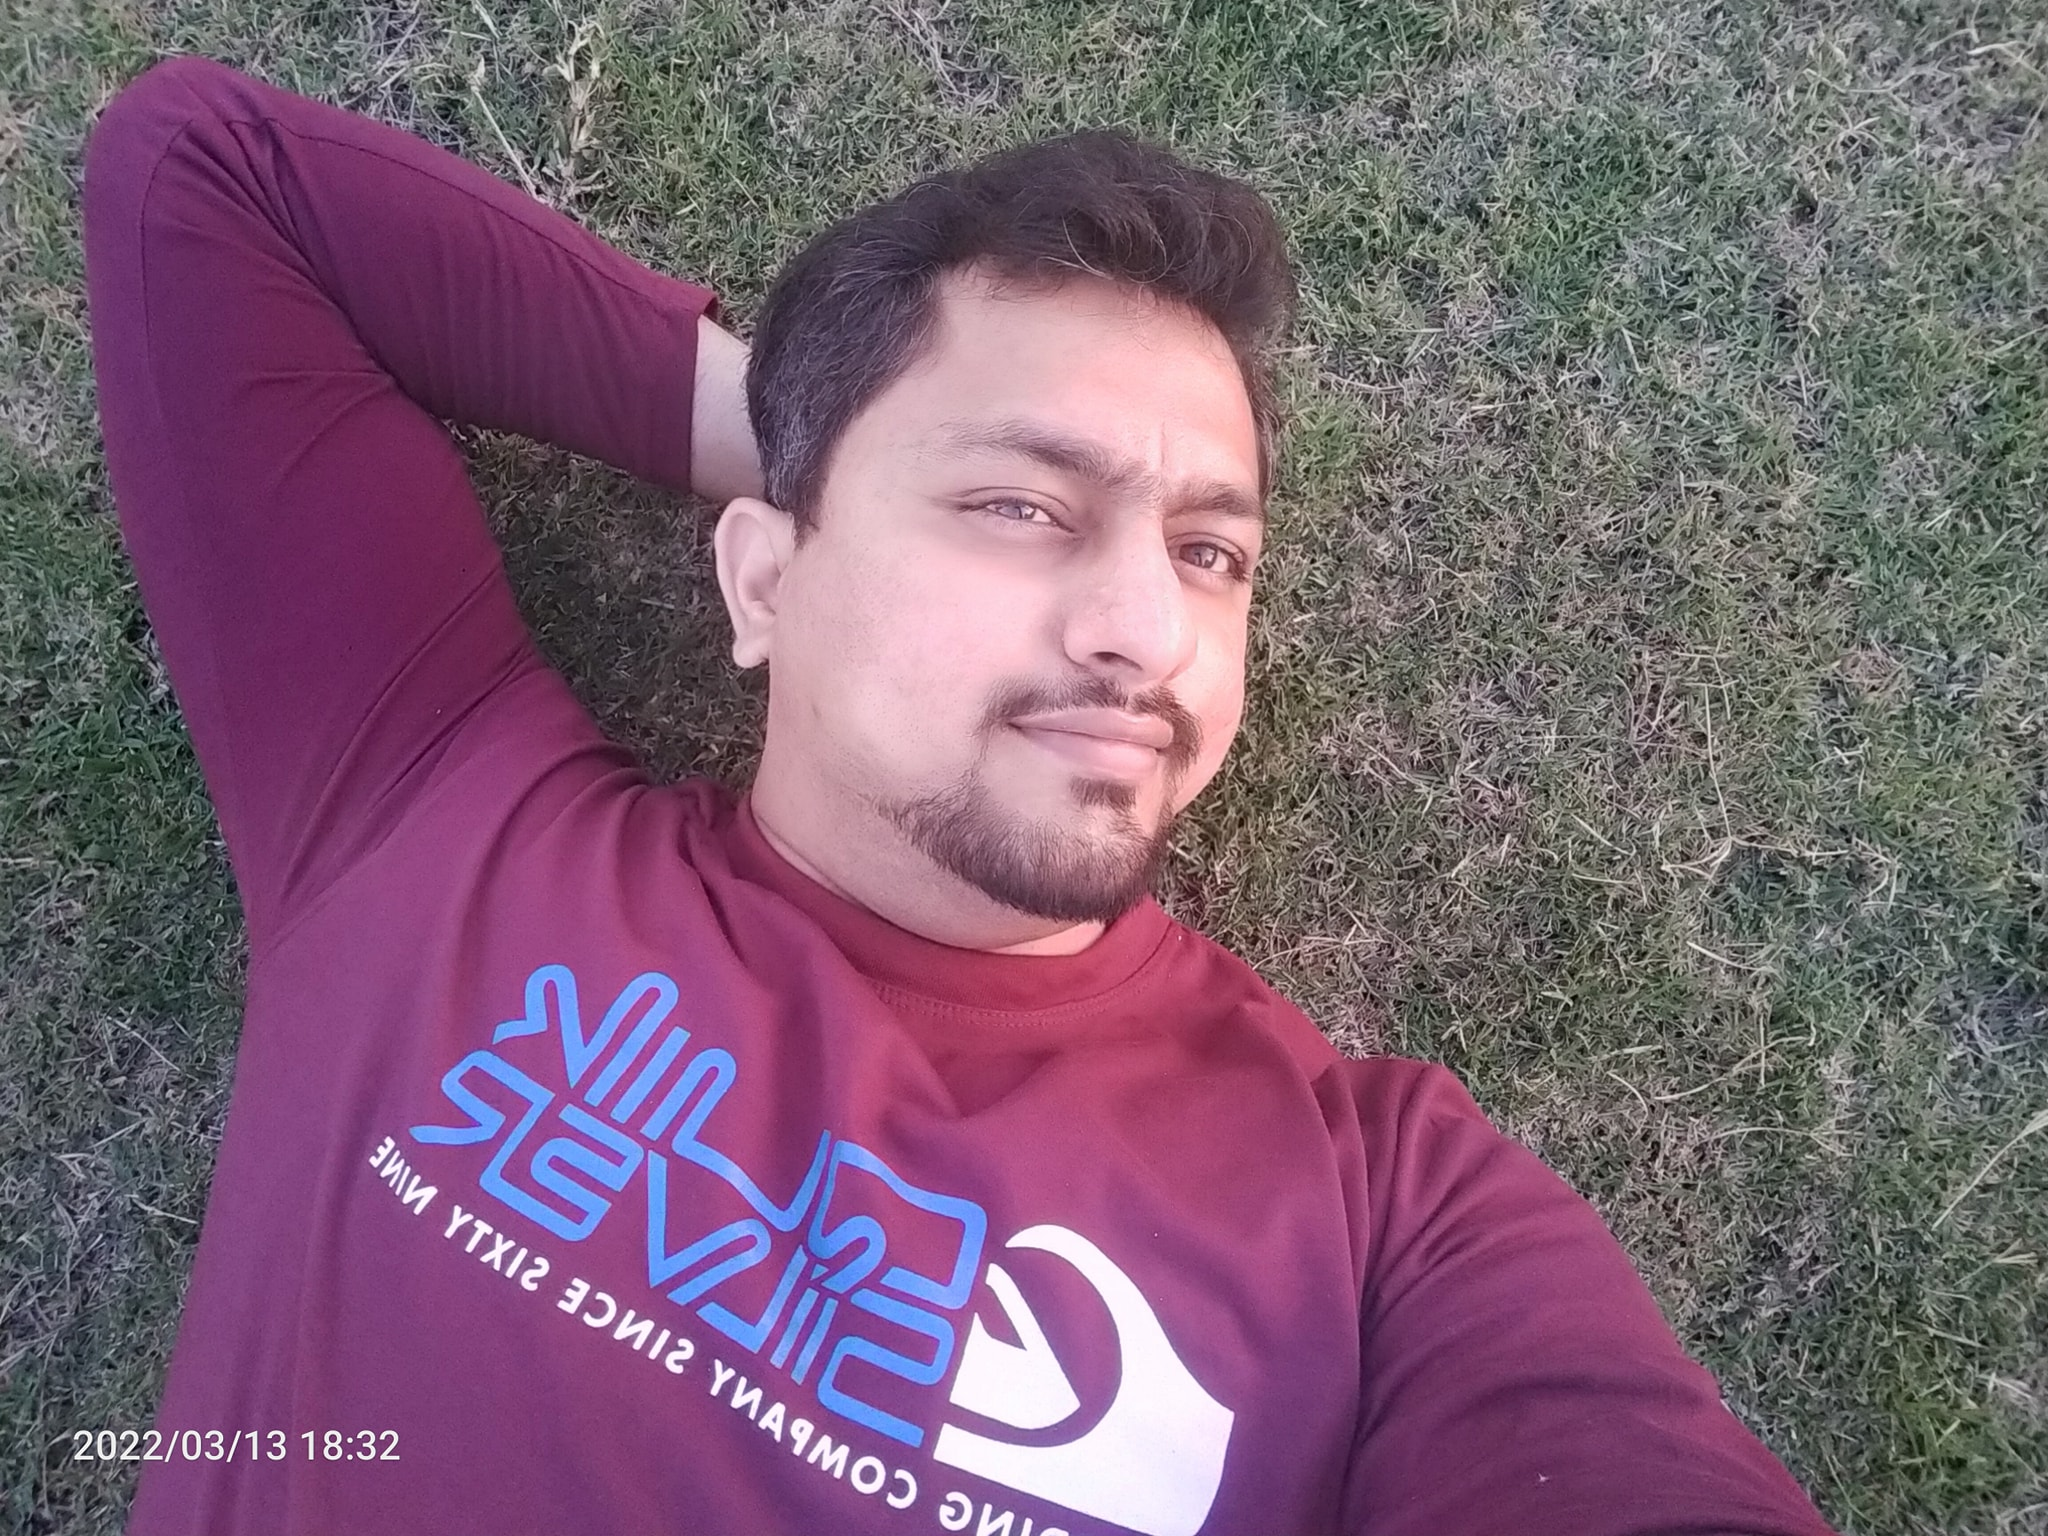

In [36]:
for i in range(0,len(results[0])):
    name = results[0][i].entity.get('words')
    print(name)
    try:
        display(Image.open('./images/'+name+'.jpg'))
    except:
        display(Image.open('./images/'+name+'.png'))